# **TASK - 4  SALES PREDICTION USING PYTHON**

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.

# **Reading and Understanding Data**

In [ ]:
#supressing the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the csv file
sales_data = pd.read_csv('advertising.csv')

In [ ]:
#print all the data
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
#Print only first five records
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**DATA INSPECTION**

In [ ]:
#Getting some information about sales data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Insight -                                         
1. Average expenses spend is highest on the TV.
2. Average expenses spend is lowest on the Radio.
3. Maximum Sales is 27 and minimum is 1.60.

In [ ]:
#Checking the number of missing values
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is not any missing value so data cleaning is not required .

# ***DATA VISUALISATION***

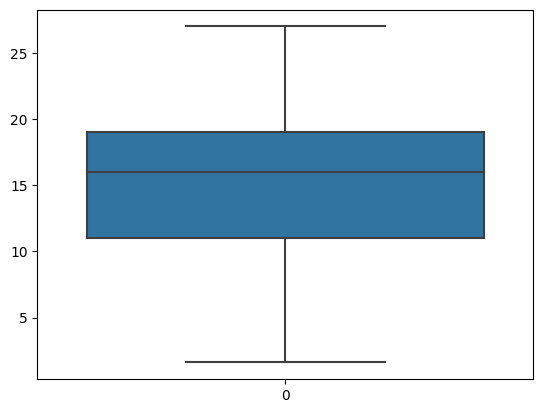

In [ ]:
#Check the variation of sales
sns.boxplot(sales_data['Sales'])
plt.show()

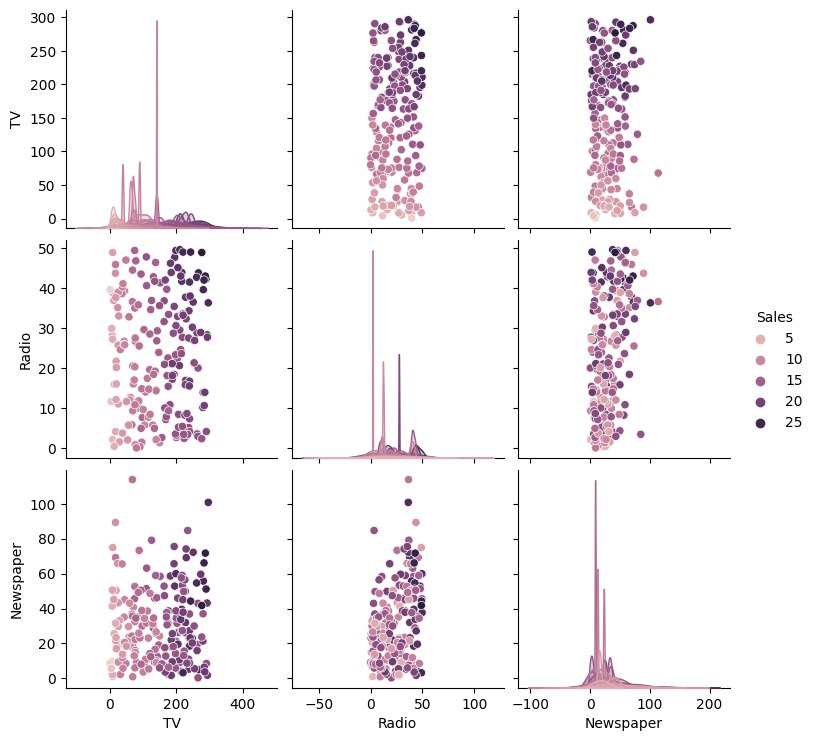

In [ ]:
#Now we check the relation of eac attribute with other attributes
sns.pairplot(sales_data , hue = 'Sales', aspect=1 , kind='scatter')
plt.show()

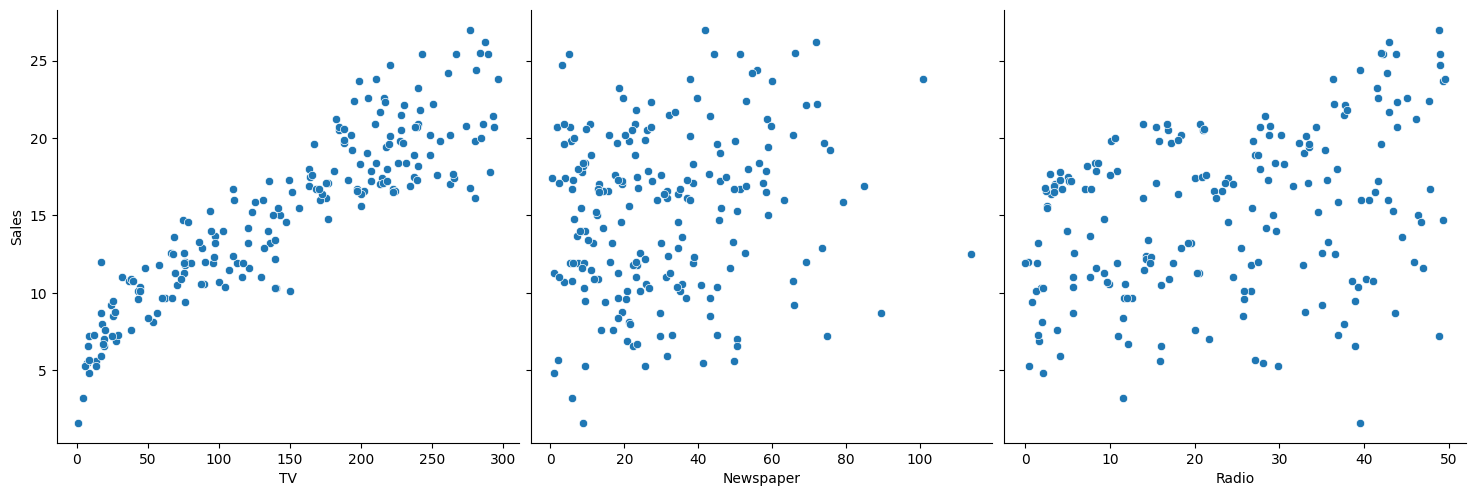

In [ ]:
#creating a pair plot foe checkimh relation of 'Sales' with other attributes
sns.pairplot(sales_data , x_vars=['TV' , 'Newspaper' , 'Radio'] , y_vars='Sales' , height =5 , aspect=1 , kind='scatter')
plt.show()

When advertising cost increases the Sales on TV ads also increases linearly .

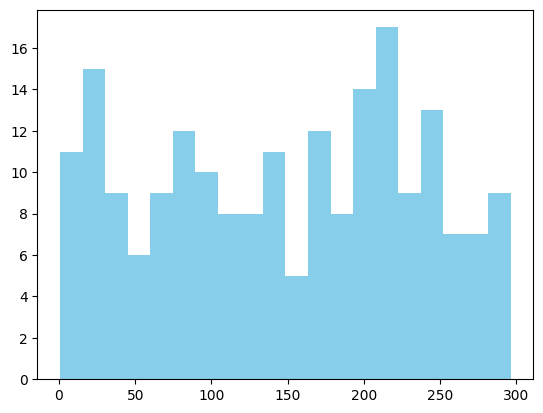

In [ ]:
#Histogram for 'TV'
plt.hist(sales_data['TV'] , bins=20 , color='skyblue')
plt.show()

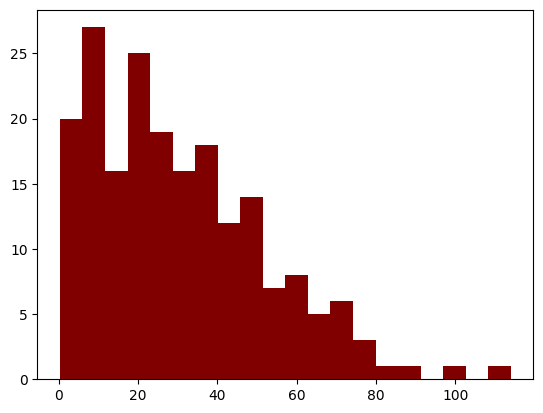

In [ ]:
#Histogram for 'Newspaper'
plt.hist(sales_data['Newspaper'] , bins=20 , color='maroon')
plt.show()

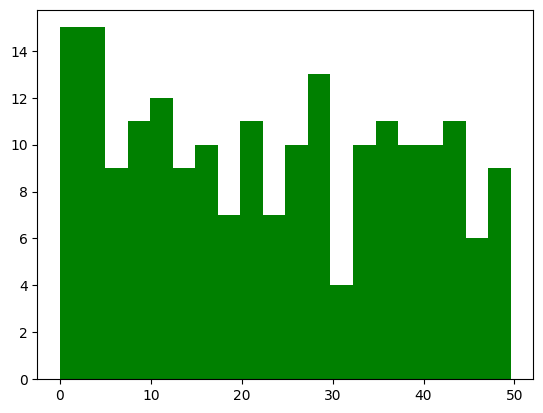

In [ ]:
#Histogram for 'Radio'
plt.hist(sales_data['Radio'] , bins=20 , color='green')
plt.show()

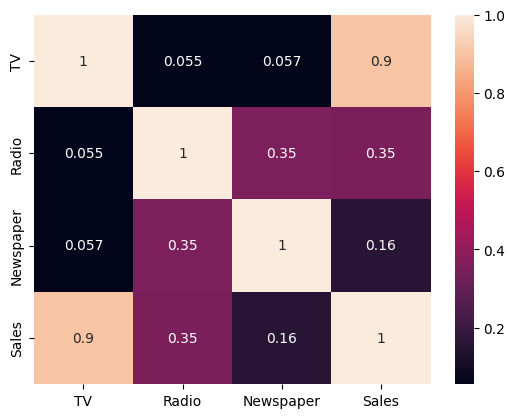

In [ ]:
#generating the heatmap
sns.heatmap(sales_data.corr() , annot = True)
plt.show()


From above visualization we can see that 'TV' is most correlated to 'Sales' than other attributes .
So we perform the Linear Regression on 'TV'.

# **SEPERATING FEATURES AND TARGET VARIABLES**
As we see that TV is mostly correlated with Sales so we assign a feture variable 'x' to TV and feature varible 'y' to Sales.

In [ ]:
x = sales_data['TV']
y= sales_data['Sales']

In [ ]:
print(x)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64


In [ ]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


**SPLITTING THE DATA INTO TRAIN-TEST DATA**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#making the train_size = 0.7 andtest_size = 0.3 with random split
x_train , x_test , y_train , y_test = train_test_split(x ,y , train_size = 0.7 ,test_size = 0.3 , random_state=100)


In [ ]:
print(x , x_train.shape , x_test.shape)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64 (140,) (60,)


In [ ]:
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [ ]:
print(x_train)

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64


In [ ]:
print(x_test)

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
167    206.8
116    139.2
96     197.6
52     216.4
69     216.8
164    117.2
124    229.5
182     56.2
154    187.8
125     87.2
196     94.2
194    149.7
177    170.2
163    163.5
31     112.9
11     214.7
73     129.4
15     195.4
41     177.0
97     184.9
128    220.3
133    219.8
82      75.3
139    184.9
123    123.1
83      68.4
65      69.0
151    121.0
162    188.4
170     50.0
77     120.5
32      97.2
173    168.4
174    222.4
85     193.2
168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
46      89.7
75      16.9
28     248.8
29      70.6
195     38.2
40     202.5
153    171.3
115     75.1
64     131.1
59     210.7
1       44.5
192     17.2
136     25.6
152    197.6
161     85.7
Name: TV, dtype: float64


In [ ]:
x_train = x_train.values.reshape(-1, 1)

In [ ]:
x_test = x_test.values.reshape(-1, 1)

In [ ]:
y_train = y_train.values.reshape(-1 , 1)
y_test = y_test.values.reshape(-1 , 1)

In [ ]:
print(y_train)

[[17. ]
 [16.5]
 [22.6]
 [15. ]
 [14. ]
 [11.9]
 [17.3]
 [12.9]
 [ 6.6]
 [18.4]
 [13.2]
 [ 8.5]
 [10.9]
 [16.4]
 [16.7]
 [18.2]
 [18.4]
 [12.6]
 [18. ]
 [16.9]
 [ 9.2]
 [12.5]
 [23.8]
 [15.5]
 [16.1]
 [20.1]
 [ 9.4]
 [17.6]
 [17.3]
 [26.2]
 [10.7]
 [21.5]
 [15.9]
 [14.7]
 [11.8]
 [20.2]
 [17. ]
 [17.5]
 [19.8]
 [15.6]
 [20.5]
 [17.8]
 [27. ]
 [16.4]
 [20.7]
 [10.9]
 [20. ]
 [14.6]
 [16.6]
 [23.7]
 [16.8]
 [ 5.6]
 [ 7.3]
 [19.8]
 [10.8]
 [17.4]
 [ 6.9]
 [16.1]
 [14.6]
 [16.9]
 [21.7]
 [20.7]
 [ 6.7]
 [11.9]
 [19.6]
 [10.1]
 [12.4]
 [ 7.2]
 [25.4]
 [17.9]
 [10.1]
 [ 7.6]
 [10.8]
 [18.3]
 [17.7]
 [17.6]
 [10.3]
 [22.1]
 [ 5.3]
 [ 8. ]
 [18.9]
 [20.9]
 [15.3]
 [21.4]
 [ 7.2]
 [13.7]
 [ 8.8]
 [24.4]
 [11.3]
 [10.1]
 [19.8]
 [23.2]
 [20.9]
 [ 5.5]
 [20.9]
 [14. ]
 [25.4]
 [15. ]
 [ 7. ]
 [12. ]
 [11.8]
 [10.3]
 [24.2]
 [ 9.7]
 [11.6]
 [14.8]
 [ 7.3]
 [17.9]
 [16.7]
 [19.2]
 [ 9.7]
 [12.9]
 [ 5.7]
 [ 5.3]
 [ 3.2]
 [ 1.6]
 [12. ]
 [22.2]
 [20.8]
 [12.3]
 [23.8]
 [ 8.1]
 [12. ]
 [10.4]
 [25.5]


In [ ]:
print(y_test)

[[ 6.6]
 [20.7]
 [17.2]
 [19.4]
 [21.8]
 [17.2]
 [12.2]
 [16.7]
 [22.6]
 [22.3]
 [11.9]
 [19.7]
 [ 8.7]
 [20.6]
 [10.6]
 [14. ]
 [17.3]
 [16.7]
 [18. ]
 [11.9]
 [17.4]
 [11. ]
 [22.4]
 [17.1]
 [20.5]
 [24.7]
 [19.6]
 [11.3]
 [20.7]
 [15.2]
 [13.6]
 [11.3]
 [11.6]
 [19.9]
 [ 8.4]
 [14.2]
 [13.2]
 [16.7]
 [16.5]
 [20.2]
 [17.1]
 [17.1]
 [17.5]
 [17.2]
 [13.2]
 [10.6]
 [ 8.7]
 [18.9]
 [10.5]
 [ 7.6]
 [16.6]
 [16. ]
 [12.6]
 [16. ]
 [18.4]
 [10.4]
 [ 5.9]
 [ 9.5]
 [16.6]
 [13.3]]


# **MODEL TRAINING**

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Training the Linear Regression model with Training data
model.fit(x_train , y_train)

LinearRegression()

# **MODEL EVALUATION**

In [ ]:
# accuracy on the training data
X_test_prediction = model.predict(x_test)

In [ ]:
print(X_test_prediction)

[[ 7.37414007]
 [19.94148154]
 [14.32326899]
 [18.82329361]
 [20.13239168]
 [18.2287449 ]
 [14.54145201]
 [17.72692398]
 [18.75238413]
 [18.77420243]
 [13.34144544]
 [19.46693349]
 [10.01415451]
 [17.1923756 ]
 [11.70507285]
 [12.08689312]
 [15.11418241]
 [16.23237035]
 [15.8669138 ]
 [13.1068987 ]
 [18.65965635]
 [14.00690363]
 [17.60692332]
 [16.60328147]
 [17.03419291]
 [18.96511257]
 [18.93783969]
 [11.05597839]
 [17.03419291]
 [13.66326538]
 [10.6796127 ]
 [10.71234015]
 [13.5487193 ]
 [17.22510305]
 [ 9.67597085]
 [13.52144643]
 [12.25053038]
 [16.13418799]
 [19.07965865]
 [17.48692266]
 [18.69783838]
 [16.53237199]
 [15.92145955]
 [18.86693021]
 [13.5050827 ]
 [11.84143724]
 [ 7.87050642]
 [20.51966653]
 [10.79961336]
 [ 9.03233096]
 [17.99419817]
 [16.29237067]
 [11.04506924]
 [14.09963141]
 [18.44147334]
 [ 9.3759692 ]
 [ 7.88687015]
 [ 8.34505447]
 [17.72692398]
 [11.62325422]]


In [ ]:
# accuracy on the test data
Y_test_prediction = model.predict(y_test)

In [ ]:
print(Y_test_prediction)

[[7.30868517]
 [8.07778029]
 [7.88687015]
 [8.00687081]
 [8.13778061]
 [7.88687015]
 [7.61414139]
 [7.85959727]
 [8.18141722]
 [8.16505349]
 [7.59777766]
 [8.02323453]
 [7.42323125]
 [8.07232571]
 [7.52686818]
 [7.71232374]
 [7.89232473]
 [7.85959727]
 [7.93050675]
 [7.59777766]
 [7.8977793 ]
 [7.54868648]
 [8.17050807]
 [7.88141557]
 [8.06687113]
 [8.2959633 ]
 [8.01777996]
 [7.56505021]
 [8.07778029]
 [7.77777864]
 [7.69050544]
 [7.56505021]
 [7.58141393]
 [8.03414368]
 [7.40686752]
 [7.72323289]
 [7.66868714]
 [7.85959727]
 [7.84868812]
 [8.05050741]
 [7.88141557]
 [7.88141557]
 [7.90323388]
 [7.88687015]
 [7.66868714]
 [7.52686818]
 [7.42323125]
 [7.97959793]
 [7.52141361]
 [7.36323092]
 [7.8541427 ]
 [7.82141525]
 [7.63595969]
 [7.82141525]
 [7.95232505]
 [7.51595903]
 [7.27050314]
 [7.46686785]
 [7.8541427 ]
 [7.67414171]]


USING STATISTICAL MODEL

In [ ]:
import statsmodels.api as sm

In [ ]:
#getting the coefficient of regression line
model.coef_

array([[0.05454575]])

In [ ]:
#getting an intercept value
model.intercept_

array([6.9486832])

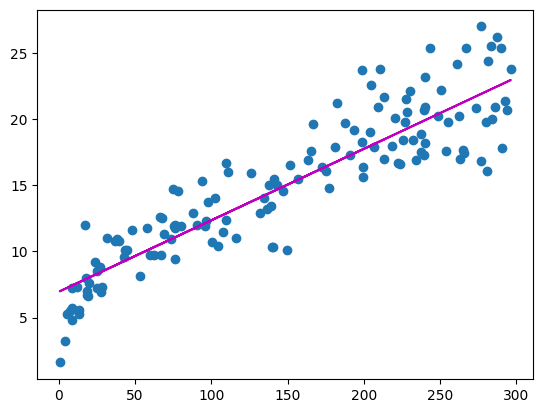

In [ ]:
# Visualising fit on test set
plt.scatter(x_train , y_train)
plt.plot(x_train , 6.948 + 0.054*x_train , 'm')
plt.show()

Conclusion :        
The above mention solution is able to predict the 'Sales'.